In [2]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
model_LB_vio_fad=read_sbml_model('Models/model_VN_LB_vio-fad.xml')

In [3]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [4]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model_LB_vio_fad)

{<Reaction Growth at 0x1dec27e5cd0>: 1.0}

# LB media

## Analysis of glucose uptake in LB media

### Glucose bound set to -1000, 1000

Optimal glucose uptake rate for growth: -473.68421052631584


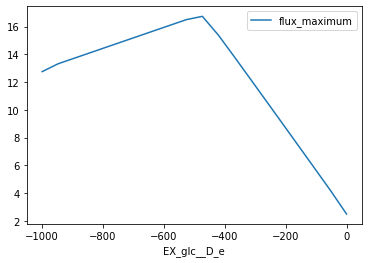

In [36]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000, 1000
    ppp_succ_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    print('Optimal glucose uptake rate for growth:', ppp_succ_LB.EX_glc__D_e[ppp_succ_LB.flux_maximum.idxmax()])
    ppp_succ_LB.plot(x='EX_glc__D_e', y='flux_maximum')

### Glucose and oxygen bounds set to -1000, 1000

Optimal glucose uptake rate for growth: -894.7368421052631


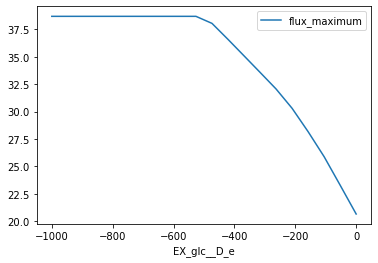

In [37]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000, 1000
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_succ_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_glc__D_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    print('Optimal glucose uptake rate for growth:', ppp_succ_LB.EX_glc__D_e[ppp_succ_LB.flux_maximum.idxmax()])
    ppp_succ_LB.plot(x='EX_glc__D_e', y='flux_maximum')

## Optimal O2 uptake rate in LB media

### Oxygen uptake for growth

Optimal oxygen uptake rate for growth: -578.9473684210527


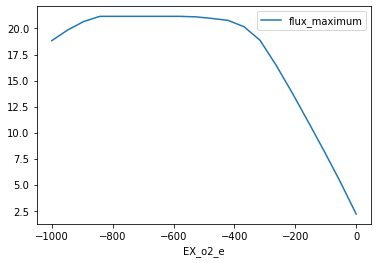

In [55]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_LB_growth = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                    objective=model_LB_vio_fad.reactions.Growth)
    print('Optimal oxygen uptake rate for growth:', ppp_o2_LB_growth.EX_o2_e[ppp_o2_LB_growth.flux_maximum.idxmax()])
    ppp_o2_LB_growth.plot(x='EX_o2_e', y='flux_maximum')

### Oxygen uptake for production

Optimal oxygen uptake for Violacein production: -578.9473684210527


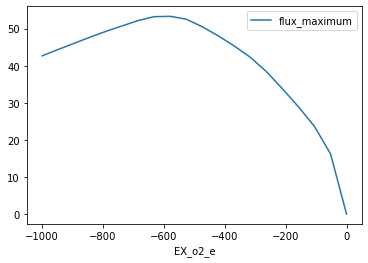

In [57]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_LB_vio = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.EX_o2_e],
                    objective=model_LB_vio_fad.reactions.Violacein)
    print('Optimal oxygen uptake for Violacein production:', ppp_o2_LB_vio.EX_o2_e[ppp_o2_LB_vio.flux_maximum.idxmax()])
    ppp_o2_LB_vio.plot(x='EX_o2_e', y='flux_maximum')

## Analysis of the correlation between Growth and Violacein production in LB media

### With oxygen uptake bounds set to default values

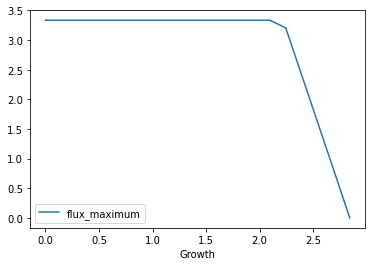

In [65]:
with model_LB_vio_fad:
    ppp_Growth_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    ppp_Growth_LB.plot(x='Growth', y='flux_maximum')

If the growth rate increases above about 2.2, the violacein production starts to decrease. Therfore the growth and the production are inversly proportional to each other.

### With oxygen uptake bounds set to -1000, 1000

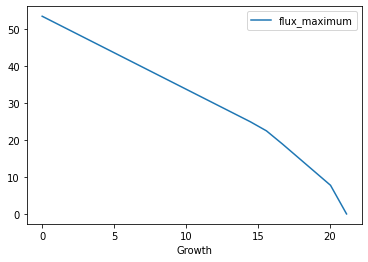

In [64]:
with model_LB_vio_fad:
    model_LB_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_Growth_LB = production_envelope(model_LB_vio_fad,
                    reactions=[model_LB_vio_fad.reactions.Growth],
                    objective=model_LB_vio_fad.reactions.Violacein)
    ppp_Growth_LB.plot(x='Growth', y='flux_maximum')

The correlation between growth rate and production is still inversly proportional, but here the model uses the optimal values, so we get really high values, but they also have way too high demands in glucose and oxygen uptakes (see the exact numbers in the Substrates_study file)

# M9 media

In [16]:
model_M9_vio_fad=read_sbml_model('Models/model_VN_M9_vio-fad.xml')

## Analysis of glucose uptake in M9 media

We first set the boundaries to -1000, but during the plotting it showed that a lot less is needed, so we set it to -20, so we can see the changes in the graph better. (After -20 the graph shows a steady straight line.)

### Glucose bounds set to -20, 1000

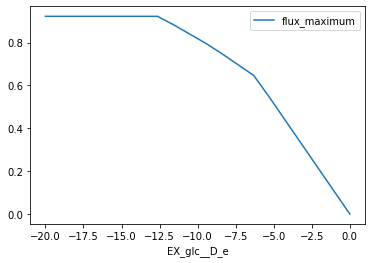

In [53]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000
    ppp_succ_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    ppp_succ_M9.plot(x='EX_glc__D_e', y='flux_maximum')

### Glucose uptake rate bounds set to -20, 1000 and oxygen uptake rate bounds set to -1000, 1000

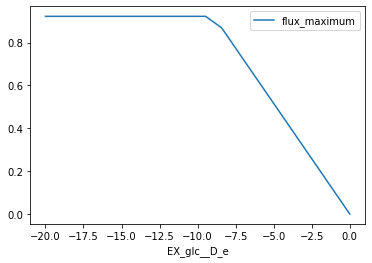

In [54]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -20, 1000
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_succ_M9_2 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_glc__D_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    ppp_succ_M9_2.plot(x='EX_glc__D_e', y='flux_maximum')

## Optimal O2 uptake rate in M9 media

### Oxygen uptake for growth

Optimal oxygen uptake rate for growth: -19.73684210526298


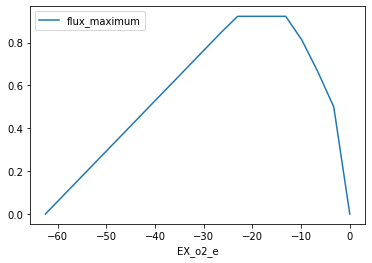

In [59]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Growth)
    print('Optimal oxygen uptake rate for growth:', ppp_o2_M9.EX_o2_e[ppp_o2_M9.flux_maximum.idxmax()])
    ppp_o2_M9.plot(x='EX_o2_e', y='flux_maximum')

### Oxygen uptake for production

Optimal oxygen uptake rate for production: -16.447368421052595


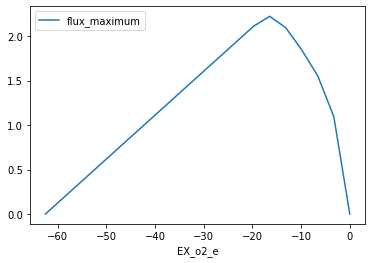

In [60]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_o2_M9_vio = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.EX_o2_e],
                    objective=model_M9_vio_fad.reactions.Violacein)
    print('Optimal oxygen uptake rate for production:', ppp_o2_M9_vio.EX_o2_e[ppp_o2_M9_vio.flux_maximum.idxmax()])
    ppp_o2_M9_vio.plot(x='EX_o2_e', y='flux_maximum')

## Analysis of the correlation between Growth and Violacein production in M9 media

### With oxygen uptake bounds set to default values

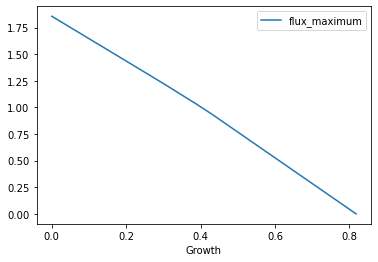

In [67]:
with model_M9_vio_fad:
    ppp_Growth_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.Growth],
                    objective=model_M9_vio_fad.reactions.Violacein)
    ppp_Growth_M9.plot(x='Growth', y='flux_maximum')

### With oxygen uptake bounds set to -1000, 1000

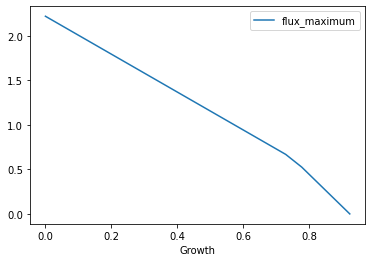

In [62]:
with model_M9_vio_fad:
    model_M9_vio_fad.reactions.EX_o2_e.bounds = -1000, 1000
    ppp_Growth_M9 = production_envelope(model_M9_vio_fad,
                    reactions=[model_M9_vio_fad.reactions.Growth],
                    objective=model_M9_vio_fad.reactions.Violacein)
    ppp_Growth_M9.plot(x='Growth', y='flux_maximum')

The growth rate and the production are inversly proportional to each other. The production rate is a little higher if we let the model optimize the oxygen uptake.